<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_13_Matplotlib Format Charts.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [69]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [70]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


## 🟩 Subplots with Bar Charts (2.13.1)

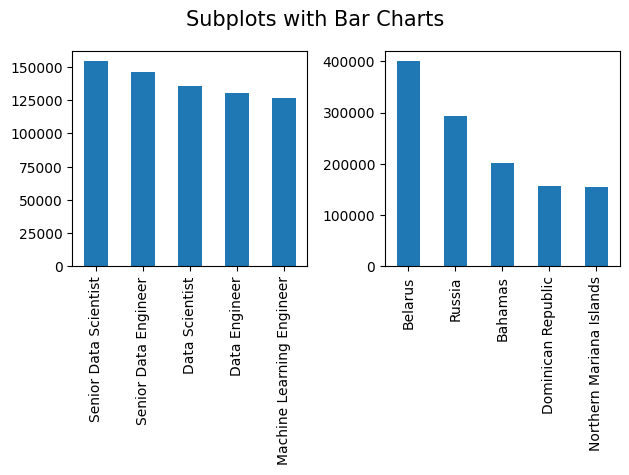

In [60]:
sub_df = df.copy()
fig, ax = plt.subplots(1, 2)

sub_df.pivot_table(index='job_title_short', values='salary_year_avg', aggfunc='mean').sort_values(by='salary_year_avg', ascending=False).head(5).plot(kind='bar', ax=ax[0])
ax[0].set_xlabel('')
ax[0].legend().remove()

sub_df.pivot_table(index='job_country', values='salary_year_avg', aggfunc='mean').sort_values(by='salary_year_avg', ascending=False).head(5).plot(kind='bar', ax=ax[1])
ax[1].set_xlabel('')
ax[1].legend().remove()

fig.suptitle('Subplots with Bar Charts', fontsize=15)
fig.tight_layout()

---

## 🟨 Subplots with Job Titles by Schedule (2.13.2)

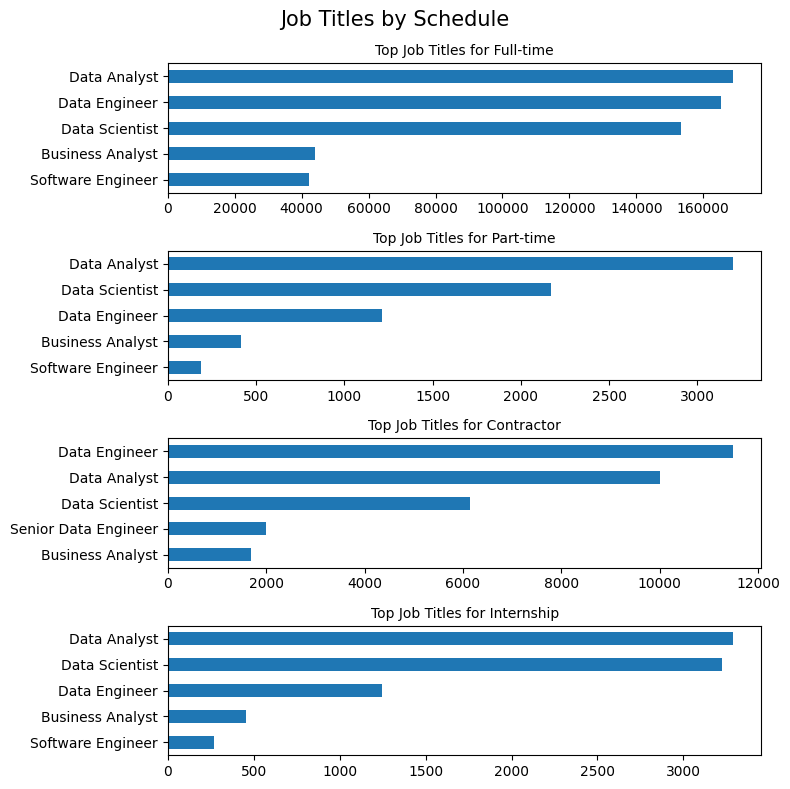

In [63]:
# Code Needed
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']
fig, ax = plt.subplots(4, 1, figsize=(8, 8))

for i, sch in enumerate(schedules):
  sch_df = df[df['job_schedule_type'] == sch]
  sch_df['job_title_short'].value_counts().sort_values(ascending=False).head().plot(kind='barh', ax=ax[i])
  ax[i].set_xlabel('')
  ax[i].set_ylabel('')
  ax[i].invert_yaxis()
  ax[i].set_title(f"Top Job Titles for {sch}", fontsize=10)

fig.suptitle('Job Titles by Schedule', fontsize=15)
fig.tight_layout()  

---

## 🟥 Top Skills for Job Roles Subplots (2.13.3)

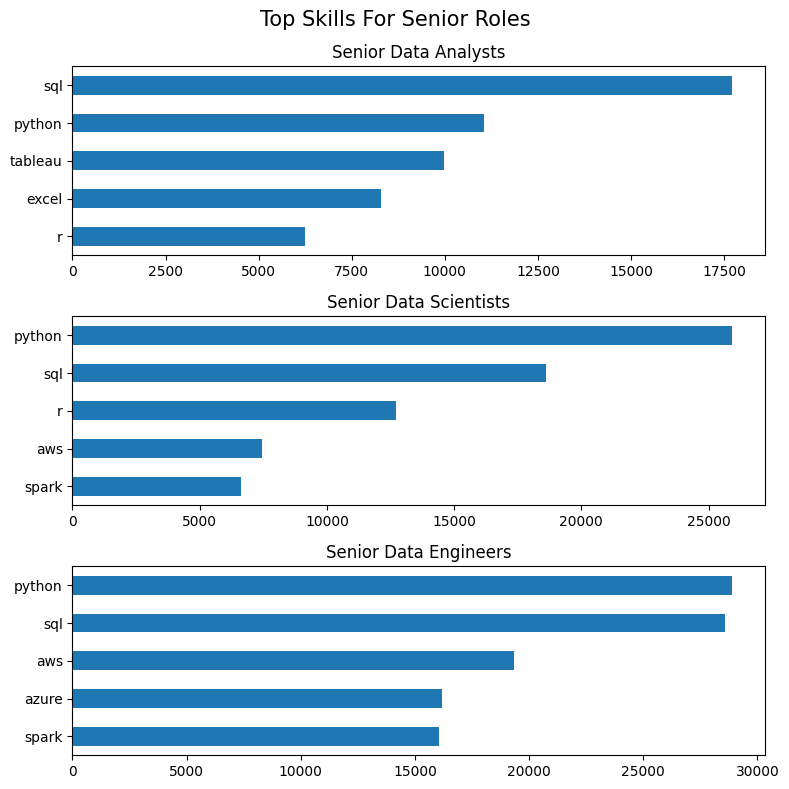

In [83]:
# Code Needed
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']
fig, ax = plt.subplots(3, 1, figsize=(8, 8))
exp_df = df.explode('job_skills')

for i, role in enumerate(job_roles):
  roles_df = exp_df[exp_df['job_title_short'] == role]
  roles_df['job_skills'].value_counts().sort_values(ascending=False).head().plot(kind='barh', ax=ax[i])
  ax[i].invert_yaxis()
  ax[i].set_ylabel('')
  ax[i].set_title(f"{role}s")

fig.suptitle("Top Skills For Senior Roles", fontsize=15)
fig.tight_layout()

---